In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

### Solution 10. Semi-confined flow between two polders
Consider one-dimensional flow between two polders with different water levels, as shown in the figure below; the semi-confining layer at the left has a resistance $c_0$ and the semi-confining layer on the right has a resistance $c_1$. The two polders are separated by a dike. The width of the dike is neglected (the vertical black line in the figure). The water level in the polder on the left is $h_0^*$ while the water level in the polder on the right is $h_1^*$.
The semi-confined aquifer extends to infinity on both sides. The transmissivity is the same on both sides and equal to $T$. 
The governing differential equations are
\begin{equation}\begin{split}
\frac{\text{d}^2(h-h_0^*)}{\text{d}x^2} &= \frac{h-h_0^*}{\lambda_0^2}  \hskip 2em  x\le 0 \\
\frac{\text{d}^2(h-h_1^*)}{\text{d}x^2} &= \frac{h-h_1^*}{\lambda_1^2}  \hskip 2em  x\ge 0 
\end{split}\end{equation}
where $\lambda_0=\sqrt{c_0T}$ and $\lambda_1=\sqrt{c_1T}$. There are separate solutions for the left and right sides:
\begin{equation}\begin{split}
h=h_0^* +  A_0\text{e}^{-x/\lambda_0} + B_0\text{e}^{x/\lambda_0}  \hskip 2em x\le 0 \\
h=h_1^* + A_1\text{e}^{-x/\lambda_1} + B_1\text{e}^{x/\lambda_1}  \hskip 2em x\ge 0 \\
\end{split}\end{equation}

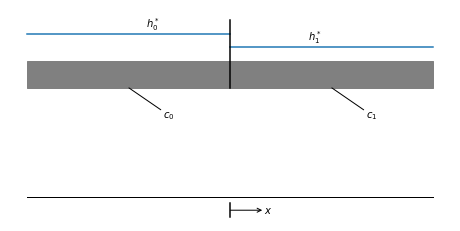

In [2]:
plt.figure(figsize=(8, 4))
plt.plot([-0.1,  1.1], [0, 0], 'k', lw=1)
plt.fill([-0.1, 1.1, 1.1, -0.1], [0.8, 0.8, 1, 1], color='grey')
plt.plot([-0.1,  0.5], [1.2, 1.2], 'C0')
plt.plot([0.5,  1.1], [1.1, 1.1], 'C0')
plt.plot([0.5, 0.5], [0.8, 1.3], 'k')
plt.text(0.25, 1.25, '$h^*_0$', ha='left')
plt.text(0.75, 1.15, '$h^*_1$', ha='center')
plt.ylim(-0.2, 1.4)
plt.plot([0.5, 0.5], [-0.05, -0.15], 'k')
plt.annotate("$x$", va='center',
            xy=(0.5, -0.1), 
            xytext=(0.6, -0.1), 
            arrowprops=dict(arrowstyle="<-", shrinkA=0, shrinkB=0))
plt.annotate("$c_0$", va='center',
            xy=(0.2, 0.8), 
            xytext=(0.3, 0.6), 
            arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=0))
plt.annotate("$c_1$", va='center',
            xy=(0.8, 0.8), 
            xytext=(0.9, 0.6), 
            arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=0))
plt.axis('off');

The boundary conditions are that the head approaches $h_0^*$ far to the left and $h_1^*$ far to the right
\begin{equation}\begin{split}
&x\to-\infty \hskip 2em h=h_0^* \\
&x\to+\infty \hskip 2em h=h_1^* \\
\end{split}\end{equation}
and continuity requires that the head and flow are continuous at $x=0$
\begin{equation}\begin{split}
&h(x=0^-)=h(x=0^+) \\
&Q_x(x=0^-)=Q_x(x=0^+) 
\end{split}\end{equation}
where $0^-$ and $0^+$ stand for just to the left and just to the right of zero, respectively. Application of the first two boundary conditions gives $A_0=0$ and $B_1=0$, after which application of the two continuity conditions gives the following two equations 
\begin{equation}\begin{split}
h_0^*+B_0 &= h_1^* + A_1 \\
-T\frac{B_0}{\lambda_0} &= T\frac{A_1}{\lambda_1}
\end{split}\end{equation}
Solving for the two remaining unknowns $A_1$ and $B_0$ gives
\begin{equation}
A_1 = \frac{\lambda_1}{\lambda_0+\lambda_1}(h_0^*-h_1^*)  \hskip 2em 
B_0 = -\frac{\lambda_0}{\lambda_0+\lambda_1}(h_0^*-h_1^*)
\end{equation}
and hence
\begin{equation}\begin{split}
h&=h_0^*  -\frac{\lambda_0}{\lambda_0+\lambda_1}(h_0^*-h_1^*) \text{e}^{x/\lambda_0}  \hskip 2em x\le 0 \\
h&=h_1^* + \frac{\lambda_1}{\lambda_0+\lambda_1}(h_0^*-h_1^*) \text{e}^{-x/\lambda_1} \hskip 2em x\ge 0 \\
\end{split}\end{equation}
Note that for the case of equal resistance values (so that $\lambda_0=\lambda_1$), the head in the aquifer at $x=0$ is $(h_0^*+h_1^*)/2$ as is to be expected from symmetry when the aquifer properties are the same on the left and right sides of the dike. 

The discharge vector is obtained as
\begin{equation}
Q_x=-T\frac{\text{d}h}{\text{d}x}
\end{equation}
which gives
\begin{equation}\begin{split}
Q_x&=\frac{T(h_0^*-h_1^*)}{\lambda_0+\lambda_1} \text{e}^{x/\lambda_0}  \hskip 2em x\le 0 \\
Q_x&=\frac{T(h_0^*-h_1^*)}{\lambda_0+\lambda_1} \text{e}^{-x/\lambda_1} \hskip 2em x\ge 0 \\
\end{split}\end{equation}
The total flow $Q_0$ from the polder on the left to the polder on the right is 
\begin{equation}
Q_0=Q_x(x=0)=\frac{T(h_0^*-h_1^*)}{\lambda_0+\lambda_1}
\end{equation}
Note again that 95% of the $Q_0$ has leaked from the polder into the aquifer over a distance of $3\lambda_0$ to the left of the dike, and 95% of the $Q_0$ has discharged and into the polder on the right over a distance of $3\lambda_1$. In other words, three times the leakage factor away from a disturbance, the head in the aquifer is approximately equal to the head above the semi-confining layer. 

An example is presented below:

In [3]:
def makeplot(c0=100, c1=400):
    # parameters
    h0star = 1
    h1star = -1
    k = 10
    H = 10
    # solution h, Qx
    T = k * H
    lab0 = np.sqrt(c0 * T)
    lab1 = np.sqrt(c1 * T)
    x = np.linspace(-1000, 1000, 101)
    h = np.zeros_like(x)
    h[x < 0]  = h0star - lab0 / (lab0 + lab1) * (h0star - h1star) * np.exp(x[x < 0] / lab0)
    h[x >= 0] = h1star + lab1 / (lab0 + lab1) * (h0star - h1star) * np.exp(-x[x >= 0] / lab1)
    Qx = np.zeros_like(x)
    Qx[x<0] = T * (h0star - h1star) / (lab0 + lab1) * np.exp(x[x<0] / lab0)
    Qx[x>=0] = T * (h0star - h1star) / (lab0 + lab1) * np.exp(-x[x>=0] / lab1)
    # solution psi
    psi = np.zeros((2, len(x)))
    psi[1] = -Qx
    xg = x
    zg = [0, H]
    # plot
    plt.figure(figsize=(10, 8))
    plt.subplot(211)
    plt.xlim(-1000, 1000)
    plt.ylabel('head')
    plt.plot(x, h)
    plt.axvline(-3 * lab0, linestyle=':', color='C2')
    plt.axvline(3 * lab1, linestyle=':', color='C2')
    plt.axvline(0, linestyle=':', color='C1')
    plt.text(-3 * lab0, -1, r'$-3\lambda_0$', ha='left', va='bottom')
    plt.text(3 * lab1, -1, r'$3\lambda_1$', ha='right', va='bottom')
    plt.subplot(212)
    plt.title('streamlines')
    plt.contour(xg, zg, psi, 20, colors='C0', linestyles='-')
    plt.axvline(-3 * lab0, linestyle=':', color='C2')
    plt.axvline(3 * lab1, linestyle=':', color='C2')
    plt.text(-3 * lab0, 0.2, r'$-3\lambda_0$', ha='left', va='bottom')
    plt.text(3 * lab1, 0.2, r'$3\lambda_1$', ha='right', va='bottom')
    plt.xlim(-1000, 1000)
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    
interact(makeplot, c0=(50, 600, 50), c1=(50, 600, 50));

interactive(children=(IntSlider(value=100, description='c0', max=600, min=50, step=50), IntSlider(value=400, d…